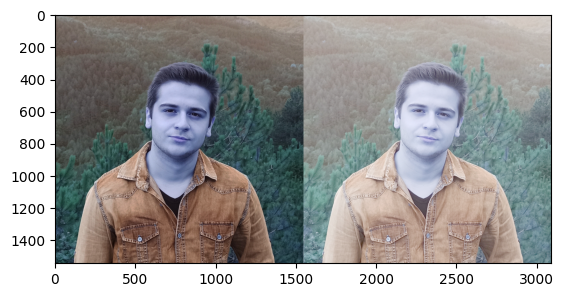

In [8]:
#Gamma Donusumu
import cv2
import numpy as np
from matplotlib import pyplot as plt

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)


img = cv2.imread('furkan.jpg')
gammaImg = gammaCorrection(img, 2.2)

res = np.hstack((img,gammaImg))
plt.imshow(res)
plt.show()

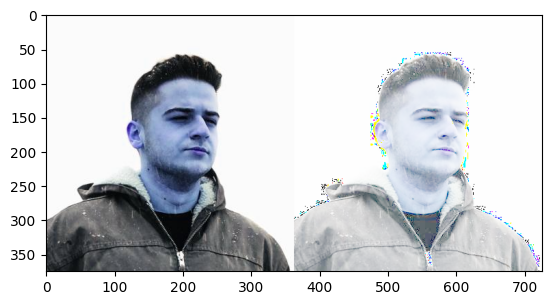

In [22]:
#Logaritmik Donusum
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide = 'ignore')
   
# Read an image
image = cv2.imread('furkan2.jpg')
   
# Apply log transformation method
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
   
# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)
   
# Display both images
res = np.hstack((image,log_image))
plt.imshow(res)
plt.show()

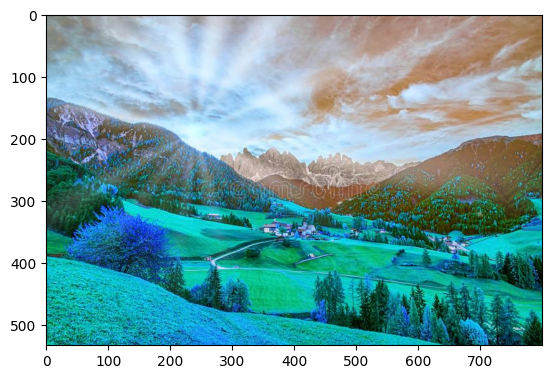

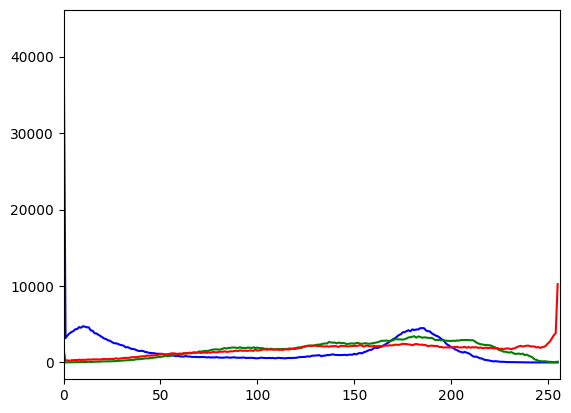

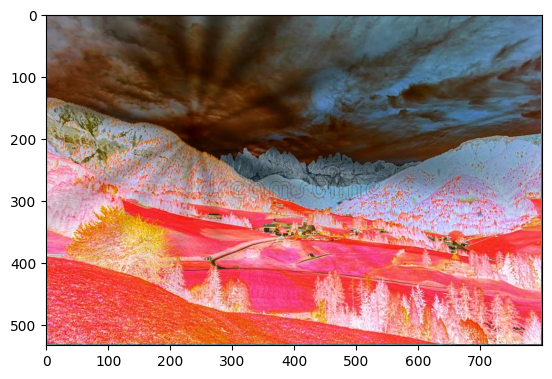

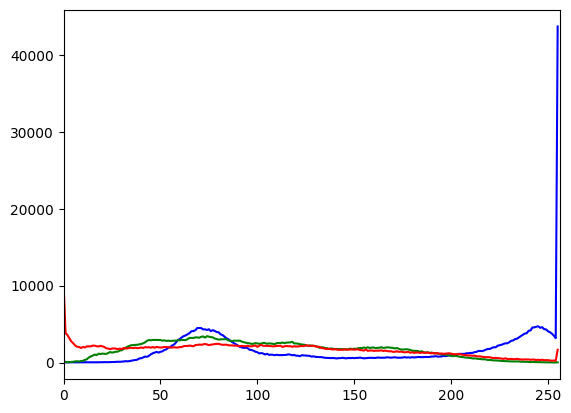

In [6]:
#Negatifini Alma
import cv2
import matplotlib.pyplot as plt
  
  
# Read an image
img_bgr = cv2.imread('scenary.jpg', 1)
plt.imshow(img_bgr)
plt.show()
  
# Histogram plotting of the image
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img_bgr], 
                         [i], None,
                         [256], 
                         [0, 256])
      
    plt.plot(histr, color = col)
      
    # Limit X - axis to 256
    plt.xlim([0, 256])
      
plt.show()
  
# get height and width of the image
height, width, _ = img_bgr.shape
  
for i in range(0, height - 1):
    for j in range(0, width - 1):
          
        # Get the pixel value
        pixel = img_bgr[i, j]
          
        # Negate each channel by 
        # subtracting it from 255
          
        # 1st index contains red pixel
        pixel[0] = 255 - pixel[0]
          
        # 2nd index contains green pixel
        pixel[1] = 255 - pixel[1]
          
        # 3rd index contains blue pixel
        pixel[2] = 255 - pixel[2]
          
        # Store new values in the pixel
        img_bgr[i, j] = pixel
  
# Display the negative transformed image
plt.imshow(img_bgr)
plt.show()
  
# Histogram plotting of the
# negative transformed image
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img_bgr], 
                         [i], None,
                         [256],
                         [0, 256])
      
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
      
plt.show()

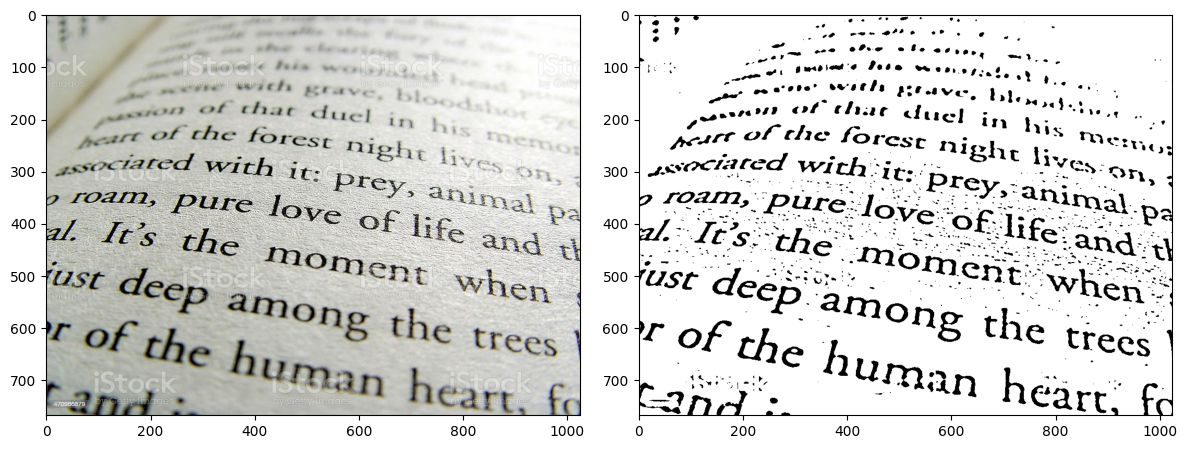

In [11]:
#Uzerinde metin olan resmin yazilarini netlestirme
import cv2
import matplotlib.pyplot as plt

# Read and prepare image
img = cv2.imread('book.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply adaptive thresholding
mask = cv2.adaptiveThreshold(blurred, 
                              255, 
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                              cv2.THRESH_BINARY, 
                              31, 
                              10)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.tight_layout()

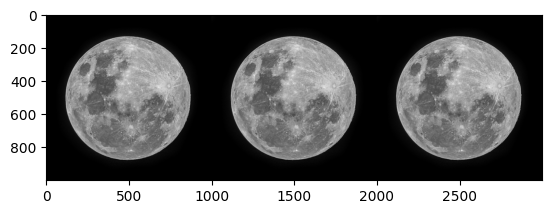

In [14]:
#Gri olcekli resmi 8,16,24 bite cevir
img = cv2.imread('moon.jpeg')
img8 = img.astype('uint8')
img16 = img.astype('uint16')
#img24 = img.astype('uint24')
res = np.hstack((img,img8,img16))
plt.imshow(res)
plt.show()

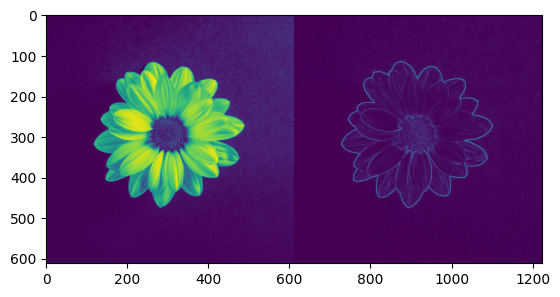

In [19]:
#Sobel - Prewitt - Robert cross filtreleme
import cv2 
import numpy as np
from scipy import ndimage

roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
image = cv2.imread('test.jpg',0)
img = cv2.imread('test.jpg',0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
res = np.hstack((image,edged_img))
plt.imshow(res)
plt.show()

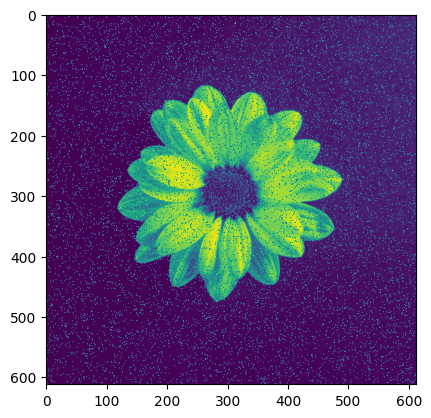

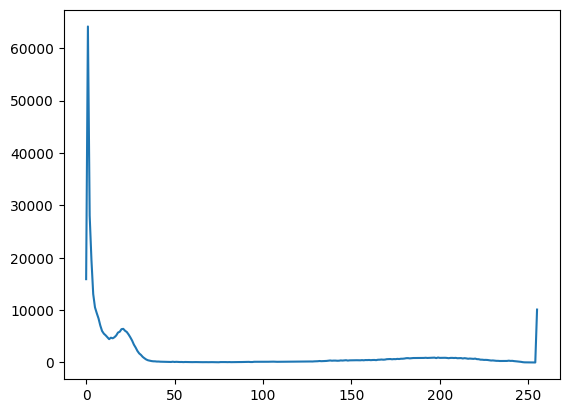

In [21]:
#Tuz biber goruntu olusturma ve histogram cikarma
import random
import cv2
 
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return img
 
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('test.jpg',cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('salt-and-pepper-test.jpg',add_noise(img))
noise=add_noise(img)
plt.imshow(noise)
plt.show()
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])

# show the plotting graph of an image
plt.plot(histr)
plt.show()